**Analysis of Supermarket Sales**

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Data
df = pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The dataset includes information on supermarket sales, such as purchase date, product category, quantity sold, unit price, total cost, payment method, and branch location. It can be downloaded in csv file.

    Data Cleaning and Preparation
        Handle any missing values, duplicates, and outliers.
        Convert data types as needed (e.g., date formatting), and prepare data for analysis.
        Generate descriptive statistics (e.g., average unit price, total sales per branch).

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [10]:
total_sales = df.groupby('Branch')['Total'].sum()
total_sales

,Total
Branch,
A,106200.3705
B,106197.6720
C,110568.7065


In [11]:
avg_unit_price = df.groupby('Branch')['Unit price'].mean()
avg_unit_price

,Unit price
Branch,
A,54.780853
B,55.659277
C,56.609024


In [12]:
avg_unit_price = df['Unit price'].mean()
avg_unit_price

55.67213

In [13]:
avg_total_sales = df['Total'].mean()
avg_total_sales

322.966749

In [14]:
Total_qty_Product = df.groupby('Product line')['Quantity'].sum()
Total_qty_Product

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


In [15]:
Avg_rating_cust = df.groupby('Customer type')['Rating'].mean()
Avg_rating_cust

,Rating
Customer type,
Member,6.940319
Normal,7.005210


In [16]:
Total_gross_income = df.groupby('Branch')['gross income'].sum()
Total_gross_income

,gross income
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


In [17]:
average_cogs_payment = df.groupby('Payment')['cogs'].mean()
average_cogs_payment

,cogs
Payment,
Cash,310.649419
Credit card,308.580836
Ewallet,303.638667



    Exploratory Data Analysis (EDA)
        Trends Analysis: Plot total sales by month and branch, identifying any seasonal or branch-specific trends.
        Category Insights: Show the top product categories in terms of quantity sold and revenue.
        Customer Insights: Analyze payment method popularity across branches and visualize patterns (e.g., cash vs. credit card usage,etc.).

In [18]:
# Extract Month and Year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [19]:
monthly_sales = df.groupby(['Month', 'Branch'])['Total'].sum().reset_index()
monthly_sales

,Month,Branch,Total
0,1,A,38681.1285
1,1,B,37176.0585
2,1,C,40434.6810
3,2,A,29860.1205
4,2,B,34424.2710
5,2,C,32934.9825
6,3,A,37659.1215
7,3,B,34597.3425
8,3,C,37199.0430


Text(0, 0.5, 'Total Sales')

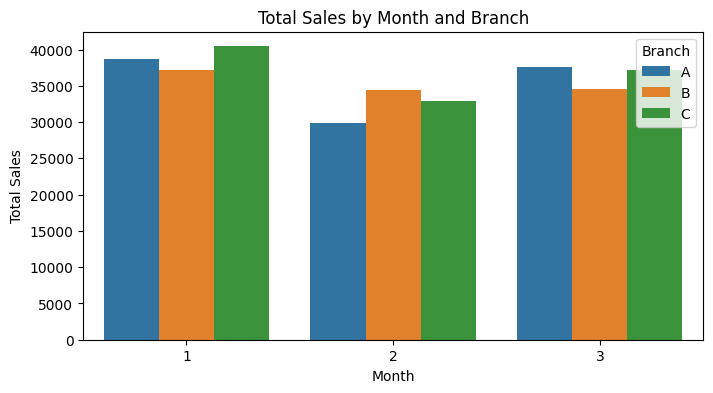

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='Month', y='Total', hue='Branch', data=monthly_sales)
plt.title('Total Sales by Month and Branch')
plt.xlabel('Month')
plt.ylabel('Total Sales')

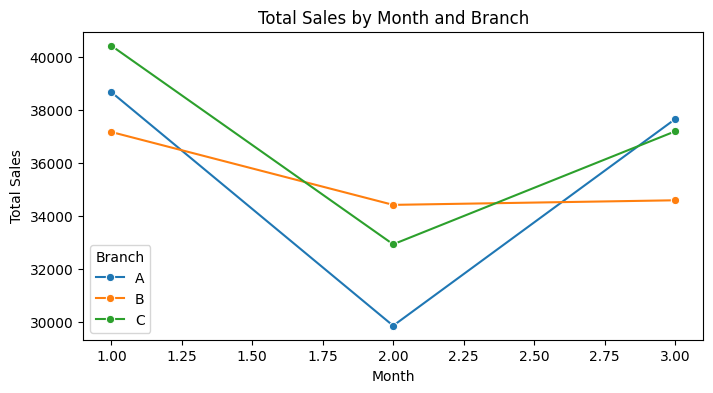

In [21]:
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_sales, x='Month', y='Total', hue='Branch', marker='o')
plt.title('Total Sales by Month and Branch')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Branch')
plt.show()

That observation suggests there might be a recurring pattern where sales become lowest in the second month for each Branch and recover in the third month.

This trends can be due to various factors, such as seasonal variations, business cycles, or specific events which affected all branches.

In [22]:
# Category Insights: Show the top product categories in terms of quantity sold and revenue.
category_insights = df.groupby('Product line').agg(
    total_quantity=('Quantity', 'sum'),
    total_revenue=('Total', 'sum')
).reset_index()
category_insights

,Product line,total_quantity,total_revenue
0,Electronic accessories,971,54337.5315
1,Fashion accessories,902,54305.8950
2,Food and beverages,952,56144.8440
3,Health and beauty,854,49193.7390
4,Home and lifestyle,911,53861.9130
5,Sports and travel,920,55122.8265


In [23]:
top_categories = category_insights.sort_values(by='total_quantity', ascending=False).reset_index(drop=True)
top_categories


,Product line,total_quantity,total_revenue
0,Electronic accessories,971,54337.5315
1,Food and beverages,952,56144.8440
2,Sports and travel,920,55122.8265
3,Home and lifestyle,911,53861.9130
4,Fashion accessories,902,54305.8950
5,Health and beauty,854,49193.7390


In [24]:
top_revenue = category_insights.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)
top_revenue

,Product line,total_quantity,total_revenue
0,Food and beverages,952,56144.8440
1,Sports and travel,920,55122.8265
2,Electronic accessories,971,54337.5315
3,Fashion accessories,902,54305.8950
4,Home and lifestyle,911,53861.9130
5,Health and beauty,854,49193.7390


In [25]:
# Aggregate Payment Method Branch
payment_count = df.groupby(['Branch', 'Payment'])['Payment'].count().reset_index(name='Count')
payment_count

,Branch,Payment,Count
0,A,Cash,110
1,A,Credit card,104
2,A,Ewallet,126
3,B,Cash,110
4,B,Credit card,109
5,B,Ewallet,113
6,C,Cash,124
7,C,Credit card,98
8,C,Ewallet,106


    Basic Predictive Modeling
        Objective: Predict the total cost of a purchase based on factors such as product category, quantity, unit price, and branch.
        Approach: Split the data into training and test sets. Build a linear regression or decision tree model.
        Evaluation: Use Mean Absolute Error (MAE) or Mean Squared Error (MSE) to evaluate model performance.

In [26]:
df1 = df[['Product line', 'Quantity', 'Unit price', 'Total', 'Branch']]
df1

,Product line,Quantity,Unit price,Total,Branch
0,Health and beauty,7,74.69,548.9715,A
1,Electronic accessories,5,15.28,80.2200,C
2,Home and lifestyle,7,46.33,340.5255,A
3,Health and beauty,8,58.22,489.0480,A
4,Sports and travel,7,86.31,634.3785,A
...,...,...,...,...,...
995,Health and beauty,1,40.35,42.3675,C
996,Home and lifestyle,10,97.38,1022.4900,B
997,Food and beverages,1,31.84,33.4320,A
998,Home and lifestyle,1,65.82,69.1110,A


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
df1['Product line'] = le.fit_transform(df1['Product line'])
df1['Branch'] = le.fit_transform(df1['Branch'])
df1.head()

,Product line,Quantity,Unit price,Total,Branch
0,3,7,74.69,548.9715,0
1,0,5,15.28,80.2200,2
2,4,7,46.33,340.5255,0
3,3,8,58.22,489.0480,0
4,5,7,86.31,634.3785,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Total',axis=1),df1.Total,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
X_test1 = pd.DataFrame(X_test)
X_test1

,Product line,Quantity,Unit price,Branch
521,4,6,83.17,2
737,0,10,58.76,2
740,4,7,55.61,2
660,5,3,42.97,1
411,5,2,21.87,1
...,...,...,...,...
408,4,4,56.53,0
332,1,5,77.02,0
208,1,3,30.37,1
613,5,1,80.93,2


In [34]:
X_test1['Predict'] = lr.predict(X_test1)

In [35]:
X_test1.head()

,Product line,Quantity,Unit price,Branch,Predict
521,4,6,83.17,2,512.118037
737,0,10,58.76,2,603.933612
740,4,7,55.61,2,410.651619
660,5,3,42.97,1,101.581192
411,5,2,21.87,1,-78.901986


In [36]:
bias = mean_absolute_error(y_test, X_test1['Predict'])
bias

58.40521077449961

In [37]:
bias1 = mean_squared_error(y_test, X_test1['Predict'])
bias1

6210.066580562088

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor()

In [40]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
X_test2 = pd.DataFrame(X_test)
X_test2.head()

,Product line,Quantity,Unit price,Branch
521,4,6,83.17,2
737,0,10,58.76,2
740,4,7,55.61,2
660,5,3,42.97,1
411,5,2,21.87,1


In [42]:
X_test2['Predict_dt'] = dt.predict(X_test2)
X_test2.head()

,Product line,Quantity,Unit price,Branch,Predict_dt
521,4,6,83.17,2,527.7510
737,0,10,58.76,2,586.6350
740,4,7,55.61,2,419.8320
660,5,3,42.97,1,140.6475
411,5,2,21.87,1,45.1080


In [43]:
bias2 = mean_absolute_error(y_test, X_test2['Predict_dt'])
bias2

6.7096575000000005

In [44]:
bias3 = mean_squared_error(y_test, X_test2['Predict_dt'])
bias3

128.50095092625

    ***Decision Tree model is more accurate compared to LinearRegression.

    Insights and Recommendations
        Summarize insights found in the EDA, such as top-performing branches or high-revenue product categories.
        Based on the model and analysis, provide 2–3 practical recommendations, such as promotional strategies for certain categories or suggesting popular payment methods for targeted promotions.

    Top-Performing Branches:

Based on total sales and transaction, performance of all brancehes are fluctuating in all three months. In second month, sales of all three branches declined and branch A has the lowest sale. That is because of seasonality or post-holiday reductions.Tnis suggesting that branch A can be targeted by marketing efforts or additional product offerings to attract more customers.

    High-Revenue Product Categories:

The top three categories in terms of revenue generation are "Food and beverages","Sports", and "travel".

The "Health and Beauty" had lower sales, suggesting an opportunity to enhance its visibility or introduce related promotions.

    Payment Method Popularity:

Credit Card are the least preferred payment methods across all branches, This indicates a customer prefer for digital or cash payment methods.
The highest usage of Ewallets was observed in Branch A.
Encourage credit cards payments by integrating rewards for frequent digital payments across branches.


    Promotions for High-Revenue Product Categories:

Offer bundled deals or loyalty rewards for 'Food and Beverages' and 'Sports' and 'Travel' categories to encourage repeat purchases, as these categories are the most profitable.
Introduce seasonal promotions in 'Health and Beauty' to drive up sales in a lower-performing category. This could include product bundling, cross-promotions with related items, or targeted discounts.
